# Import dataset and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', None)

In [2]:
filepath = './data/BeerAdvocate/'

In [3]:
df = pd.read_csv(filepath + 'BeerAdvocateMerged.csv')

In [4]:
df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers
1483916,Duck-Rabbit Brown Ale,20206,The Duck-Rabbit Craft Brewery,9790,American Brown Ale,5.6,1156759200,Metalmonk,metalmonk.23052,4.0,3.0,3.5,4.5,4.5,4.01,A vigorous release of gases occurs once you po...,1539,1539,1.118138e+09,"United States, North Carolina",676.0,323.0,84.0,3.73,"United States, North Carolina",34.0
335630,Imperial Stout,16202,Gamla Slottskällans Bryggeri AB,625,Russian Imperial Stout,9.0,1094810400,stjarnflikka,stjarnflikka.8507,4.5,4.0,4.5,4.5,4.5,4.38,The beer has a very dark black colour with a m...,85,85,1.094638e+09,Sweden,51.0,38.0,87.0,3.99,Sweden,68.0
302929,Xingu Black Beer,1314,Cervejaria Kaiser,2480,Schwarzbier,4.7,1344074400,Mojo,mojo.685919,4.5,2.5,4.0,3.5,3.5,3.37,This beer pours up a good deep black with a th...,826,439,1.342865e+09,"United States, Alabama",1341.0,597.0,79.0,3.46,Brazil,15.0


# Measure the impact of each aspect on rating

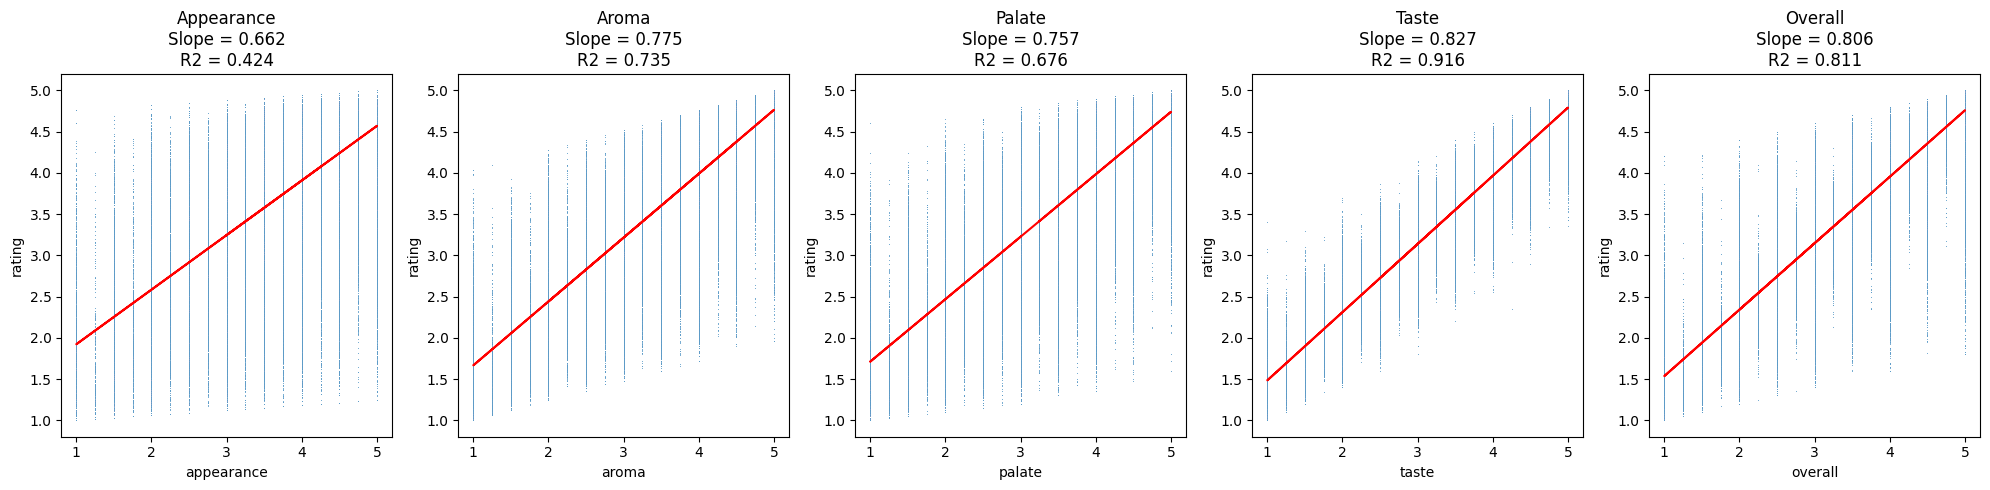

In [5]:
# fit a linear regression line to the data for all 5 aspects
reg1 = LinearRegression().fit(df[['appearance']], df['rating'])
reg2 = LinearRegression().fit(df[['aroma']], df['rating'])
reg3 = LinearRegression().fit(df[['palate']], df['rating'])
reg4 = LinearRegression().fit(df[['taste']], df['rating'])
reg5 = LinearRegression().fit(df[['overall']], df['rating'])

# create subplots for all 5 aspects
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# plot the data and regression line for each aspect
sns.scatterplot(data=df, x='appearance', y='rating', s=0.5, ax=axs[0])
axs[0].plot(df[['appearance']], reg1.predict(df[['appearance']]), color='red')
axs[0].set_title('Appearance\nSlope = ' + str(round(reg1.coef_[0], 3)) + '\nR2 = ' + str(round(reg1.score(df[['appearance']], df['rating']), 3)))

sns.scatterplot(data=df, x='aroma', y='rating', s=0.5, ax=axs[1])
axs[1].plot(df[['aroma']], reg2.predict(df[['aroma']]), color='red')
axs[1].set_title('Aroma\nSlope = ' + str(round(reg2.coef_[0], 3)) + '\nR2 = ' + str(round(reg2.score(df[['aroma']], df['rating']), 3)))

sns.scatterplot(data=df, x='palate', y='rating', s=0.5, ax=axs[2])
axs[2].plot(df[['palate']], reg3.predict(df[['palate']]), color='red')
axs[2].set_title('Palate\nSlope = ' + str(round(reg3.coef_[0], 3)) + '\nR2 = ' + str(round(reg3.score(df[['palate']], df['rating']), 3)))

sns.scatterplot(data=df, x='taste', y='rating', s=0.5, ax=axs[3])
axs[3].plot(df[['taste']], reg4.predict(df[['taste']]), color='red')
axs[3].set_title('Taste\nSlope = ' + str(round(reg4.coef_[0], 3)) + '\nR2 = ' + str(round(reg4.score(df[['taste']], df['rating']), 3)))

sns.scatterplot(data=df, x='overall', y='rating', s=0.5, ax=axs[4])
axs[4].plot(df[['overall']], reg5.predict(df[['overall']]), color='red')
axs[4].set_title('Overall\nSlope = ' + str(round(reg5.coef_[0], 3)) + '\nR2 = ' + str(round(reg5.score(df[['overall']], df['rating']), 3)))

plt.tight_layout()
plt.show()

# should still add confidence intervals

It seems like Taste as the biggest impact on the rating while appearance has the least impact.

# Data filtering and enrichment

## Serving type

In [7]:
# Create 3 different columns according to the text review, "bottle", "can", "draft"

bottle = ['bottle', 'bottled', 'bottles']
can = ['can', 'canned', 'cans']
draft = ['draft', 'draught', 'tap', 'taps']
# Create different columns if review text contains the word
df['bottle'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in bottle))
df['can'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in can))
df['draft'] = df['text'].apply(lambda x: any(ele in x.lower() for ele in draft))

In [8]:
# remove every row where columns bottle, can and draft are all False
df = df[df[['bottle', 'can', 'draft']].any(axis=1)]
# display(df.sample(3))
# print('We have {} valid reviews'.format(df.shape[0]))

# remove every row with more than 1 true
df = df[df[['bottle', 'can', 'draft']].sum(axis=1) == 1]
# display(df.sample(3))
# print('We have {} valid reviews'.format(df.shape[0]))

#create a new column with the serving type
df['serving_type'] = df[['bottle', 'can', 'draft']].idxmax(axis=1)

# drop the columns bottle, can and draft
df.drop(['bottle', 'can', 'draft'], axis=1, inplace=True)

display(df.sample(3))

# print the number of reviews for each serving type
df['serving_type'].value_counts(normalize=False)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type
883429,Beach Road Brown Ale,76487,Offshore Ale Company,236,American Brown Ale,4.5,1404640800,jlindros,jlindros.163147,3.75,3.75,3.50,3.75,3.75,3.73,Been a long time since I've had a nice nut bro...,5314,5309,1.191665e+09,"United States, Massachusetts",34.0,10.0,84.0,3.69,"United States, Massachusetts",63.0,can
1419452,Barrel-Aged Abraxas,87246,Perennial Artisan Ales,25888,American Double / Imperial Stout,11.0,1360234800,dbc5,dbc5.341755,4.25,5.00,4.75,5.00,5.00,4.93,750 ml bottle poured into Southern Tier Pumkin...,697,51,1.245319e+09,"United States, Arizona",1310.0,130.0,100.0,4.68,"United States, Missouri",177.0,bottle
810844,Snow Cap,1889,"Pyramid Breweries, Inc.",403,Winter Warmer,7.0,1319972400,lawlerj,lawlerj.511250,3.50,4.00,4.00,3.50,4.00,3.77,Poured from a 12 oz. bottle into a tulip glass...,155,145,1.286359e+09,"United States, Nebraska",866.0,509.0,80.0,3.53,"United States, Washington",101.0,bottle


serving_type
bottle    479777
can       344842
draft     114469
Name: count, dtype: int64

## Number of valid reviews per beer and users & average rating per beer

In [9]:
# compute the number of valid reviews per user
df['user_nbr_reviews_computed'] = df.groupby('user_id')['user_id'].transform('count')

# compute the number of valid reviews per beer
df['beer_nbr_reviews_computed'] = df.groupby('beer_id')['beer_id'].transform('count')

# compute the avg rating per beer
df['beer_avg_computed'] = df.groupby('beer_id')['rating'].transform('mean')

df.sample(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,user_nbr_ratings,user_nbr_reviews,user_joined,user_location,beer_nbr_ratings,beer_nbr_reviews,beer_ba_score,beer_avg,brewery_location,brewery_nbr_beers,serving_type,user_nbr_reviews_computed,beer_nbr_reviews_computed,beer_avg_computed
1257800,Moving Parts The Ever Evolving IPA: Batch No. 4,163038,Victory Brewing Company - Downingtown,345,American IPA,7.0,1438423200,superspak,superspak.456300,4.00,4.00,4.00,4.0,4.0,4.00,"22 ounce bottle into tulip glass, best before ...",5605,5603,1.273054e+09,"United States, Michigan",97.0,27.0,86.0,3.88,"United States, Pennsylvania",317.0,bottle,4781,11,3.865455
1785674,Cascade Kriek Ale,42193,Cascade Brewing / Raccoon Lodge & Brewpub,2391,Flanders Red Ale,8.2,1261393200,GRG1313,grg1313.288024,3.50,4.00,4.00,4.0,4.0,3.97,2008 bottling. Pours a dark copper red with a ...,9991,1122,1.232017e+09,"United States, California",1149.0,292.0,93.0,4.18,"United States, Oregon",309.0,bottle,328,120,4.196583
820745,Galactica,92472,Clown Shoes,22951,American Double / Imperial IPA,8.0,1398592800,barnzy78,barnzy78.224763,3.75,4.25,4.25,4.0,4.0,4.07,"12oz bottleL - very hazy, rusty colored ale wi...",2439,1372,1.212401e+09,"United States, Illinois",1624.0,249.0,88.0,3.94,"United States, Massachusetts",119.0,bottle,942,106,3.924057


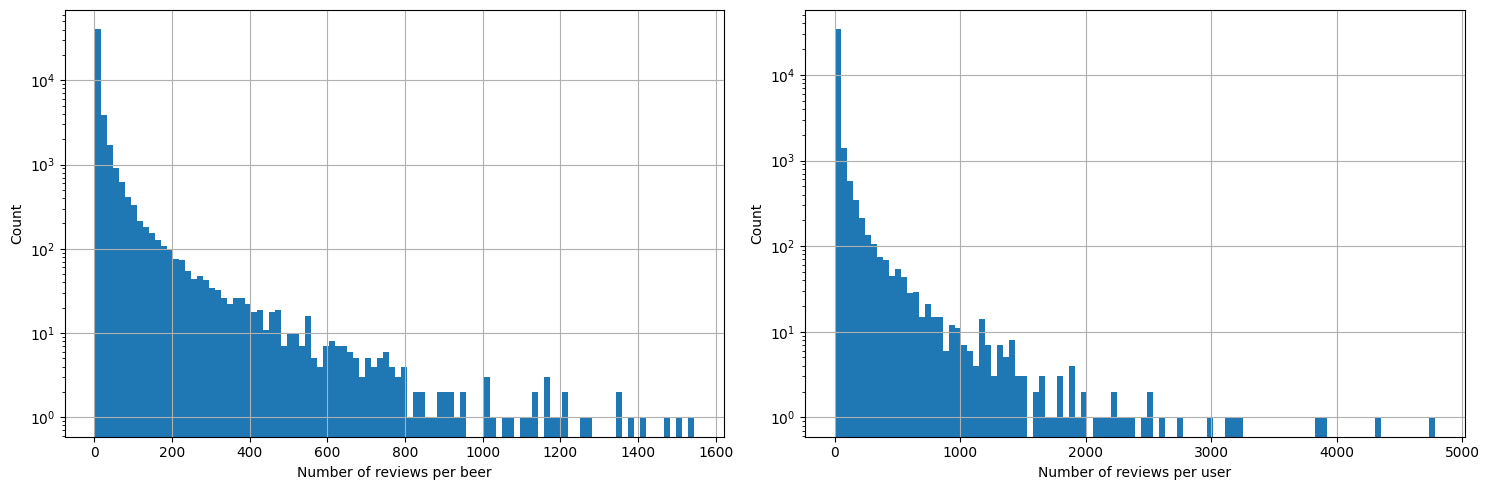

In [10]:
plt.figure(figsize=(15, 5))

# group the reviews by beer_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 1)
df.groupby('beer_id')['beer_nbr_reviews_computed'].mean().hist(bins=100, log=True)
plt.xlabel('Number of reviews per beer')
plt.ylabel('Count')

# group the reviews by user_id and show a histogram of the number of reviews computed
plt.subplot(1, 2, 2)
df.groupby('user_id')['user_nbr_reviews_computed'].mean().hist(bins=100, log=True)
plt.xlabel('Number of reviews per user')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [11]:
#Filtering to remove users and beers with less reviews

min_nbr_reviews_per_user = 10
min_nbr_reviews_per_beer = 20

len0 = df.shape[0]

# remove every row where the number of reviews per user is less than min_nbr_reviews_per_user
df_filter = df[df['user_nbr_reviews_computed'] >= min_nbr_reviews_per_user]

# remove every row where the number of reviews per beer is less than min_nbr_reviews_per_beer
df_filter_full = df_filter[df_filter['beer_nbr_reviews_computed'] >= min_nbr_reviews_per_beer]

print('We removed {} rows, leaving us with {} %% of the original dataset'.format(len0 - df_filter_full.shape[0], round(df_filter_full.shape[0] / len0 * 100, 2)))
print('We have {} valid reviews'.format(df_filter_full.shape[0]))

# print the number of reviews for each serving type
df_filter_full['serving_type'].value_counts(normalize=False)

We removed 259148 rows, leaving us with 72.4 %% of the original dataset
We have 679940 valid reviews


serving_type
bottle    368770
can       245706
draft      65464
Name: count, dtype: int64

## Readability score of the reviews

In [12]:
from textstat import flesch_reading_ease, flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index, coleman_liau_index, linsear_write_formula, dale_chall_readability_score, text_standard

In [13]:
df_sample = df_filter_full.sample(n=1000, random_state=46)

<Axes: >

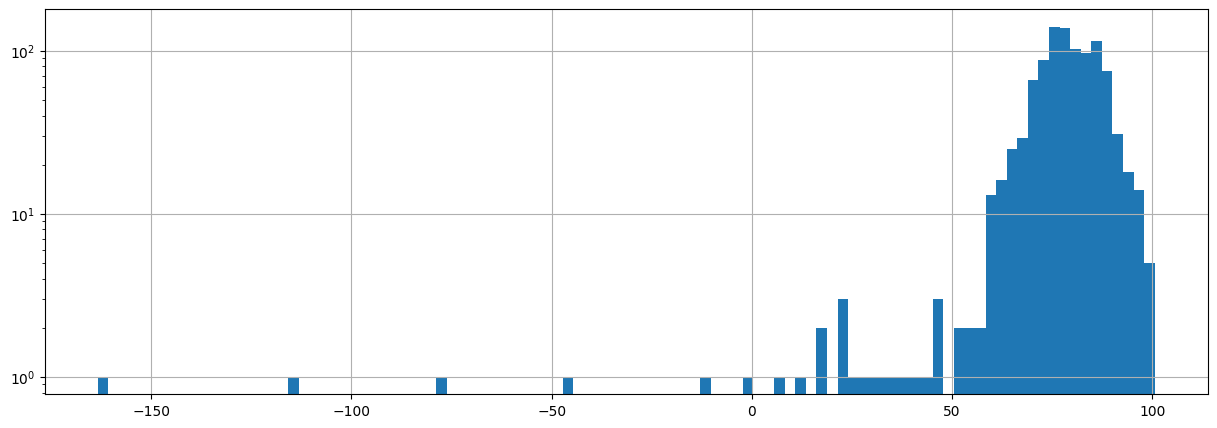

In [14]:
df_sample['readability_score'] = df_sample['text'].apply(lambda x: flesch_reading_ease(x) if isinstance(x, str) else None)
df_sample['readability_score'].hist(bins=100, figsize=(15, 5), log=True)

In [15]:
# printing some reviews based on readability score

df_sample[df_sample['readability_score'] < 20]['text'].count()

# for row in df_sample[df_sample['readability_score'] > 96]['text']:
#     print(row)
#     print('----------------------')

10

In [16]:
# remove reviews with bad readability score



## Countries grouping

In [34]:
countries = pd.read_csv('data/countries.csv', usecols=['name', 'region', 'sub-region'])
countries.sample(1)

,name,region,sub-region
234,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe


# Visualization

In [17]:
df = df_filter_full.copy()

In [18]:
# print some reviews for each serving type
print('Reviews with bottle:\n')
for text in df[df['serving_type'] == 'bottle']['text'].sample(1):
    print(text)
    print('----------------------')
print('Reviews with can:\n')
for text in df[df['serving_type'] == 'can']['text'].sample(1):
    print(text)
    print('----------------------')
print('Reviews with draft:\n')
for text in df[df['serving_type'] == 'draft']['text'].sample(1):
    print(text)
    print('----------------------')

Reviews with bottle:

Poured from a 500 ML bottle into a pint glass at the World of Beer in Pooler, GA.  The appearance is a murky pale yellow color with a large white head.  The aroma is grain and corn.  The taste is skunky with a mostly grain flavor.  A below average beer.
----------------------
Reviews with can:

Poured into a Sam glass and got a two-finger head that quickie dissipated. The body was a nice bronze red. The aroma is rich with caramel and malt, also can detect a flowery almost citrus hint. A roasted caramel malt taste with a bitter after taste. It is lightly carbonated with a decent body. This beer is very drinkable worth buying a six pack
----------------------
Reviews with draft:

On tap at Memphis Taproom in Philly. Poured into a tulip glass.A - clear, very bright gold with a shade of orange. a little over a finger of white foamy head. great lacing.S - floral, piney tangy hops. lots of the usual citrusy notes too (pineapple, grapefruit, orange). just a great blend o

In [19]:
# print the average value of the rating for each serving type
comp_str = 'rating'
print('Average ' + comp_str + ' for bottle: ', round(df[df['serving_type'] == 'bottle'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for can: ', round(df[df['serving_type'] == 'can'][comp_str].mean(), 3))
print('Average ' + comp_str + ' for draft: ', round(df[df['serving_type'] == 'draft'][comp_str].mean(), 3))

Average rating for bottle:  3.856
Average rating for can:  3.811
Average rating for draft:  3.891


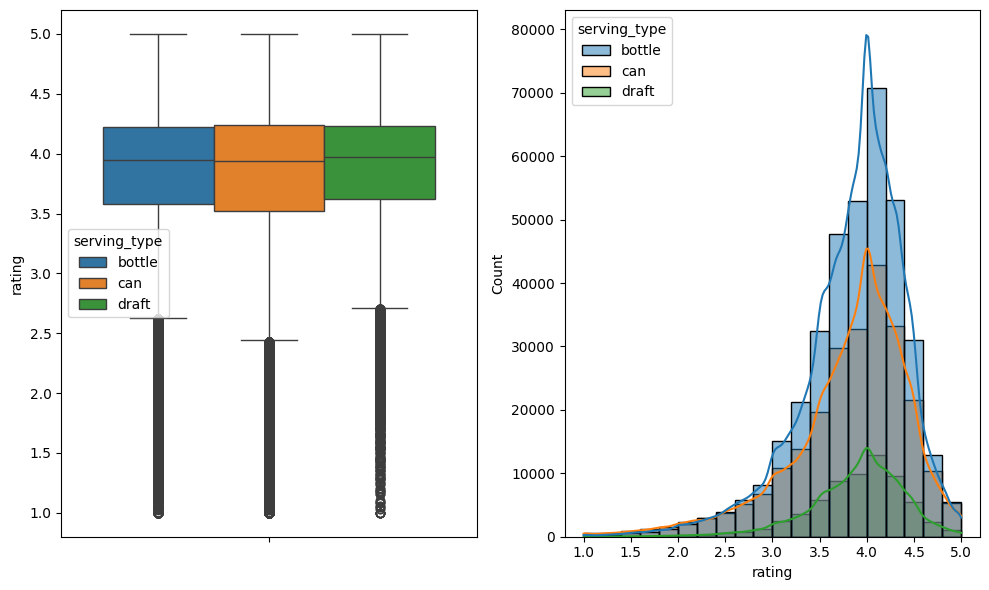

In [20]:
# show boxplot and histograms of ratings for bottle, can and draft
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(data=df, hue='serving_type', y='rating')
plt.subplot(122)
sns.histplot(data=df, hue='serving_type', x='rating', kde=True, bins=20)
plt.tight_layout()
plt.show()

# Statistical Analysis

In [21]:
def do_ttest(type1, type2, category):
    ttest = ttest_ind(df[df['serving_type'] == type1][category],df[df['serving_type'] == type2][category])
    if ttest[1] > 0.05:
        print('The p-value is high (' + str(ttest[1]) + '), so we cannot reject the null hypothesis that the two samples have the same average')
    else:
        print('The p-value is very low (' + str(ttest[1]) + '), so we can reject the null hypothesis that the two samples have the same average')

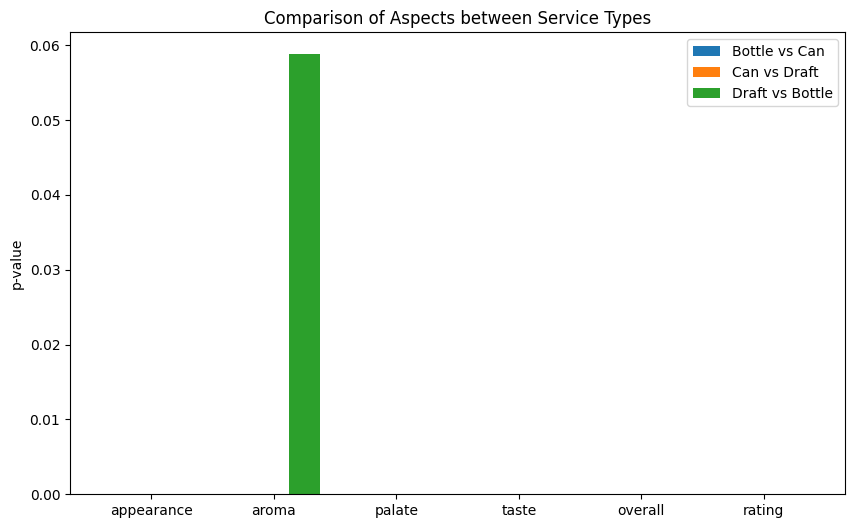

In [33]:
# define the columns to compare
columns = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

# create an empty matrix to store the p-values
p_values = np.zeros((len(columns), 3))

# perform the t-test and store the p-values in the matrix
for i in range(len(columns)):
    ttest1 = ttest_ind(df[df['serving_type'] == 'bottle'][columns[i]], df[df['serving_type'] == 'can'][columns[i]])
    ttest2 = ttest_ind(df[df['serving_type'] == 'can'][columns[i]], df[df['serving_type'] == 'draft'][columns[i]])
    ttest3 = ttest_ind(df[df['serving_type'] == 'draft'][columns[i]], df[df['serving_type'] == 'bottle'][columns[i]])
    p_values[i][0] = ttest1[1]
    p_values[i][1] = ttest2[1]
    p_values[i][2] = ttest3[1]

# create the grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(columns))
width = 0.25
rects1 = ax.bar(x - width, p_values[:,0], width, label='Bottle vs Can')
rects2 = ax.bar(x, p_values[:,1], width, label='Can vs Draft')
rects3 = ax.bar(x + width, p_values[:,2], width, label='Draft vs Bottle')
ax.set_xticks(x)
# ax.set_yscale('log')
ax.set_xticklabels(columns)
ax.set_ylabel('p-value')
ax.set_title('Comparison of Aspects between Service Types')
ax.legend()
plt.show()

All the p-values are below 0.05 (expect 1), so we can reject the null hypothesis and conclude that there is a significant difference between the groups.

In [29]:
# t-test for aroma betwwen draft and bottle
do_ttest('draft', 'bottle', 'aroma')

The p-value is high (0.05877138453991927), so we cannot reject the null hypothesis that the two samples have the same average


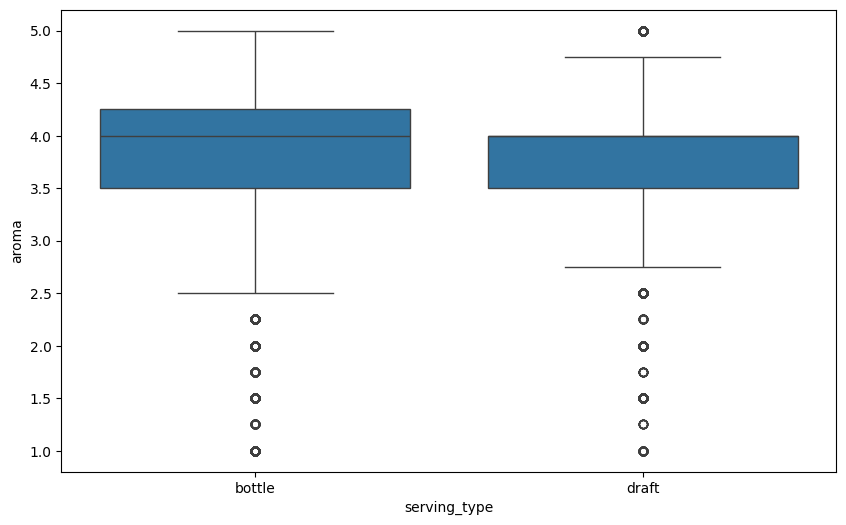

In [30]:
# show a boxplot of aroma for draft and bottle
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['serving_type'].isin(['draft', 'bottle'])], x='serving_type', y='aroma')
plt.show()